In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/content/Titanic_train.csv")
test = pd.read_csv("/content/Titanic_test.csv")

In [3]:
data = pd.concat([train, test], axis = 0)

# EDA

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


**Cabin has too much missing values, so it is best to drop it.**

In [7]:
data.drop(['Cabin'], axis = 1, inplace = True)

In [8]:
# Calculate the mode of the column
mode_value = data['Survived'].mode()[0]

# Fill missing values with the mode
data['Survived'].fillna(mode_value, inplace=True)
data['Survived'] = data['Survived'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [17]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)


In [10]:
mode_value = data['Embarked'].mode()[0]  # Get the mode (most frequent value)
data['Embarked'].fillna(mode_value, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


# EDA

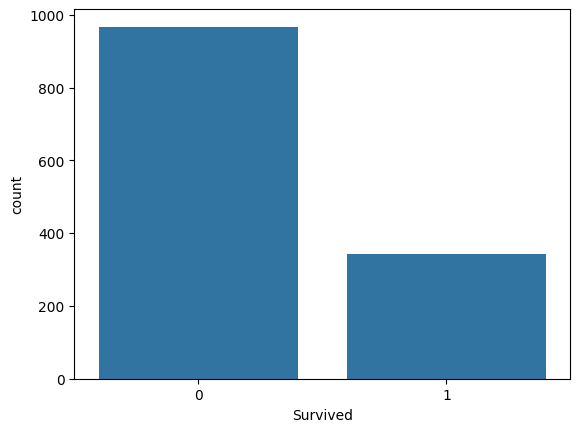

In [12]:
sns.countplot(x='Survived', data=data)
plt.show()

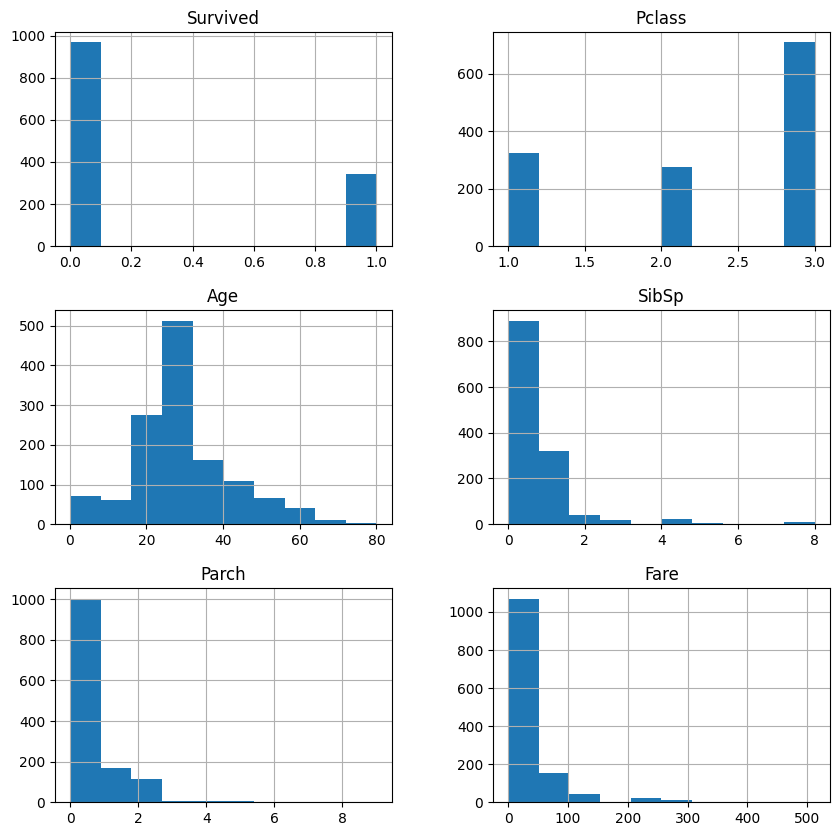

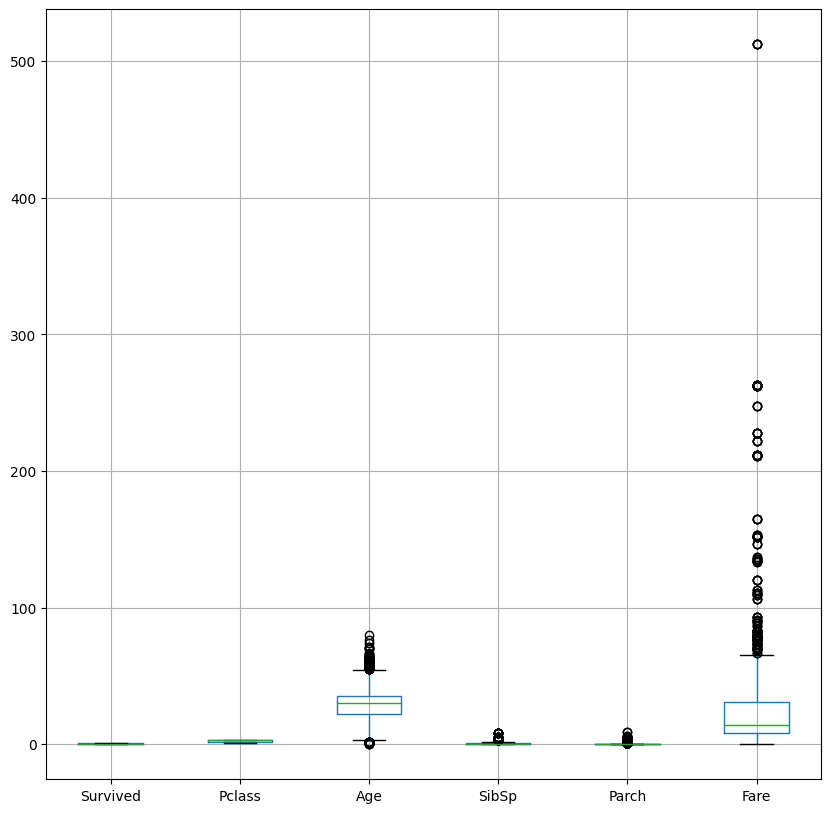

In [13]:
# histograms
data.hist(figsize=(10,10))
plt.show()

# boxplots
data.boxplot(figsize=(10,10))
plt.show()

<Axes: xlabel='Parch', ylabel='Count'>

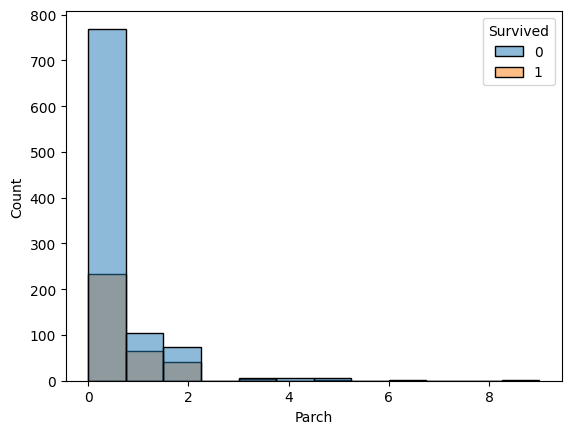

In [14]:
sns.histplot(data , x = "Parch", hue = "Survived")

<Axes: xlabel='SibSp', ylabel='Count'>

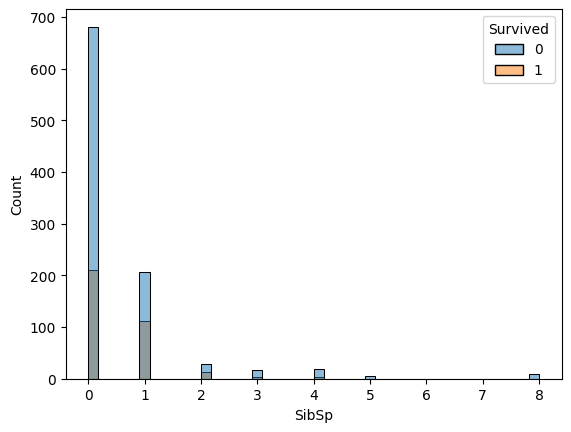

In [15]:
sns.histplot(data , x = "SibSp", hue = "Survived")

<Axes: xlabel='Fare', ylabel='Count'>

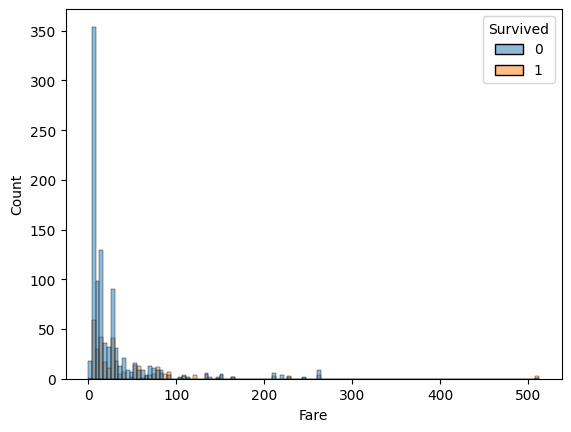

In [18]:
sns.histplot(data , x = "Fare", hue = "Survived")

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  data[col] = data[col].astype(str)
  data[col] = le.fit_transform(data[col])

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [23]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.611972,1,0,-0.503595,2
1,1,1,0,0.630431,1,0,0.734503,0
2,1,3,0,-0.301371,0,0,-0.490544,2
3,1,1,0,0.397481,1,0,0.382925,2
4,0,3,1,0.397481,0,0,-0.488127,2


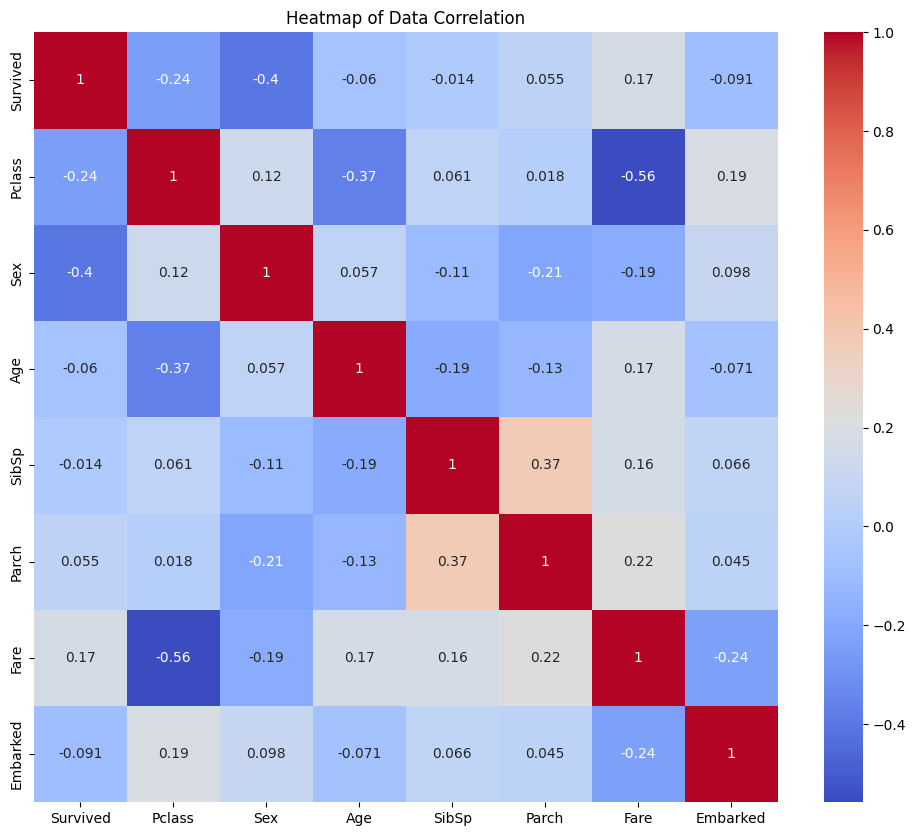

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Data Correlation', fontsize=12)
plt.show()

**LOGISTIC REGRESSION**

In [24]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.767175572519084


In [28]:
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("F1-score:", f1)

Precision: 0.6428571428571429
F1-score: 0.46956521739130436


In [30]:
!pip install streamlit
import pandas as pd
import streamlit as st
from sklearn.linear_model import LogisticRegression

st.title('Model Deployment: Logistic Regression')

st.sidebar.header('User Input Parameters')

def user_input_features():
    Pclass = st.sidebar.selectbox('Pclass',('1','2', '3'))
    Sex = st.sidebar.selectbox('Gender',('1','0'))
    Age = st.sidebar.number_input("Insert the Age")
    SibSp = st.sidebar.selectbox('Gender',('1','0','2', '3', '4', '5','8' ))
    Parch = st.sidebar.selectbox('Gender',('1','0','2', '3', '4', '5','6' ))
    Fare = st.sidebar.number_input("Insert Fare")
    Embarked = st.sidebar.selectbox('Embarked',('1','2', '3'))


    data = {'Pclass':Pclass,
            'Sex':Sex,
            'Age':Age,
            'SibSp':SibSp,
            'Parch':Parch,
            'Fare':Fare,
            'Embarked':Embarked
            }
    features = pd.DataFrame(data,index = [0])
    return features

df = user_input_features()
st.subheader('User Input parameters')
st.write(df)

#claimants = pd.read_csv("/content/processed_data.csv")
#claimants.drop(["CASENUM"],inplace=True,axis = 1)
#claimants = claimants.dropna()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  data[col] = data[col].astype(str)
  data[col] = le.fit_transform(data[col])

X = data.iloc[:,[1,2,3,4,5,6,7]]
Y = data.iloc[:,0]
clf = LogisticRegression()
clf.fit(X,Y)

prediction = clf.predict(df)  # Now df includes 'Parch' and 'SibSp'
prediction_proba = clf.predict_proba(df)

st.subheader('Predicted Result')
st.write('Yes' if prediction_proba[0][1] > 0.5 else 'No')

st.subheader('Prediction Probability')
st.write(prediction_proba)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


2024-08-09 19:05:34.455 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-09 19:05:34.463 Session state does not function when running a script without `streamlit run`
